# Машинное обучение

Любая модель машинного обучения сопоставлять элементам множества $X$ элементы множества $Y$.

Сегодня рассмотрим две классические задачи машинного обучения - классификацию и регрессию.

**Регрессия** - задача, в которой мы сопоставляем элементам $X$ какое-то вещественное число. Например, прогнозируем стоимость квартиры по входным параметрам.

**Классификация** - задача, в которой мы сопоставляем элементам $X$ метки классов. Например, определяем какая цифра нарисована на картинке.

In [36]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Задача регрессии

Самый простой алгоритм регрессии - линейная регрессия. Если данные имеют линейный вид, то можем использовать эту модель.

Модель записывается в виде уравнения:

$y = wx + b$

где $w, b$ - веса модели. Переменные могут быть не числами, а векторами, если мы хотим, чтобы модель учитывала несколько факторов.

Обучив модель на данных, мы подбираем оптимальные коэфициенты, минимизируя ошибку.

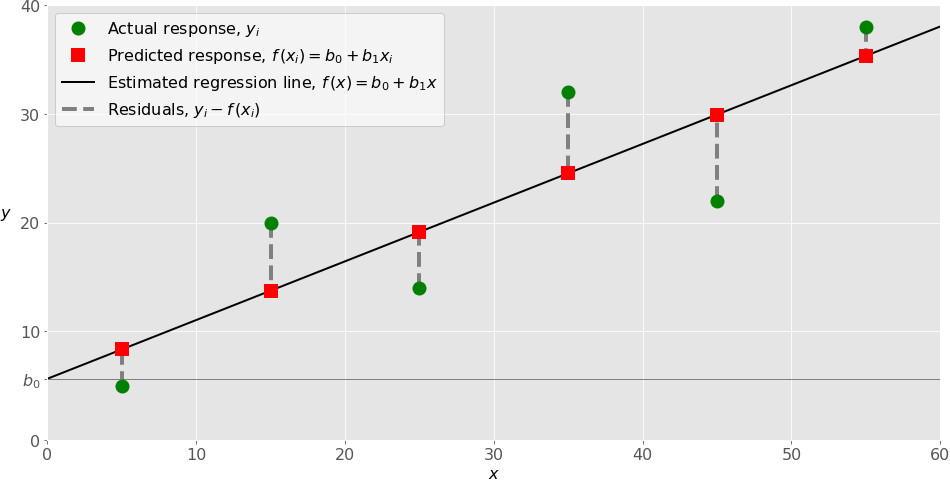

In [37]:
# ЛИнейная регрессия
# y = x * w + b
# Если много переменных
# y = x1 * w1 + x2 * w2 .... + w0
# или можно записать так:
# y = <x * w>


In [38]:
l(W) = СУММА (y - y1)**2 / n - MSE - средний квадрат ошибки

SyntaxError: cannot assign to function call (Temp/ipykernel_4476/1171689773.py, line 1)

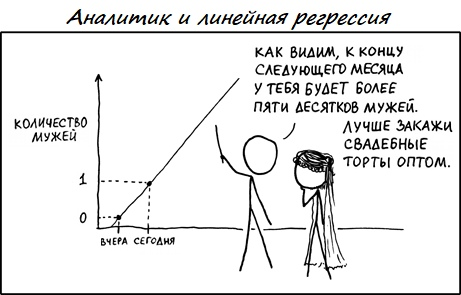

## Но как именно модели обучаются?

Для того чтобы найти минимум функции потерь (функции ошибки модели) обычно используют метод градиентного спуска. 

Основная формула выглядит так:

### $w_j = w_{j - 1} - \alpha J(X)$

Здесь $w_j$ - $j$-ый параметр (перебираем по очереди все), $\alpha$ - learning rate (с какой скоростью модель будет обучаться), $J$ - функция потерь и $X$ - тренировочный датасет.

Если данных слишком много и загрузить все за раз проблематично, то можно вместо всего $X$ брать какое-то одно значение. Тогда количество шагов для сходимости будем значительно больше, но каждый шаг будет гораздо быстрее.

Такой подход называется **стохастический градиентный спуск (SGD)**.

А если брать не одно значение, а какое-то случайное подмножество (например, на каждой итерации брать 32 примера), то такое подмножество будет называться батчем, а подход **MiniBatch**

[Подробнее можно прочитать тут](https://neurohive.io/ru/osnovy-data-science/gradient-descent/)

## Загрузим данные 

Будем использовать данные о стоимости домов в Бостоне.

Загрузим данные и прочитаем описание

In [41]:
data = load_boston()

In [42]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [43]:
x_df = pd.DataFrame(data['data'], columns=data['feature_names'])
x_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
y_df = pd.DataFrame(data['target'], columns=['y'])
y_df.head()

,y
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Также разобьем данные на треноровочную и тестовую выборки (`train` и `test`).

В будущем модели будем обучать на тренировочных данных, а проверять на тестовых

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8)
x_train.shape, x_test.shape

## Попытаемся визуально изучить данные

Построим график, который попарно отображает зависимости в данных

In [ ]:
full_df = pd.concat([x_df, y_df], axis=1)
sns.pairplot(full_df)

In [ ]:
full_df.corr()

## Кажется, цена зависит от LSTAT

Построим линейную модель с одним признаком и оценим ее качество

Возьмем модель линейной регрессии и обучим ее

In [ ]:
model = LinearRegression()
model.fit(x_train[['LSTAT']], y_train)


Как теперь оценить качество модели? 

Можно построить прогноз по тестовой выборке и посчитать на ней ошибку.

In [ ]:
y_pred = model.predict(x_test[['LSTAT']])
mean_squared_error(y_pred, y_test)

Полученная ошибка - это много или мало? 

Чтобы ответить однозначно - нужно свести это значение к цифрам из нашего мира и посмотреть описание таргета (переменной $y$). 

MSE - квадратичная величина, поэтому для оценки можно взять из нее корень.

Также, мы можем построить несколько разных моделей и сравнить их результаты между собой.

## Оценим качество

В случае с линейной регрессией можно нарисовать результат и попробовать оценить на глаз

Возьмем в качестве x числа от 0 до 35 и передадим их в модель, чтобы построить линию прогноза модели

In [ ]:
x = np.linspace(0, 35, 100).reshape(-1, 1)
y = model.predict(x)

На графике красная линия - прогноз модели, а синие точки - тестовая выборка.

Видим, что прогноз достаточно похож на данные, хоть и не улавливает все закономерности

In [ ]:
full_df.loc[x_test.index].plot(kind='scatter', x='LSTAT', y='y')
plt.plot(x, y, color='r')

Также можем посмотреть на прогнозы и исходные данные. Получим похожий график.

In [ ]:
plt.scatter(x_test['LSTAT'], y_pred)
plt.scatter(x_test['LSTAT'], y_test)

Ну и наконец, можно отложить по оси X предсказанные значения, а по оси Y фактические. Чем больше график будет похож на прямую линию, тем лучше качество модели.

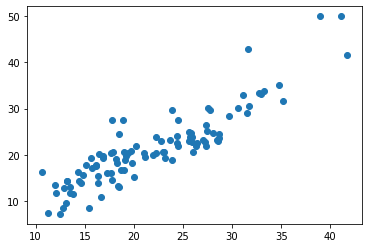

In [61]:
plt.scatter(y_pred, y_test)

Выглядит неплохо. Но все еще непонятно - большая ошибка или маленькая.

Построим гистограмму распределения изначальных $y$

array([[<AxesSubplot:title={'center':'y'}>]], dtype=object)

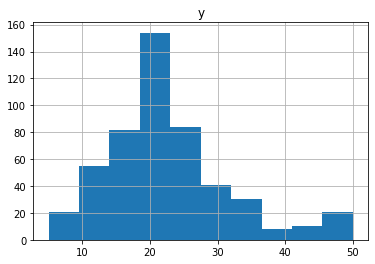

In [62]:
y_df.hist()

В общем, ошибка не такая большая. Но можем ли лучше?

## Задача

С помощью модели полиномиальной регрессии построить прогноз цены по признаку `LSTAT`.

В `sklearn` нет модели полиномиальной регрессии, но она почти не отличается от линейной регрессии в плане поиска коэфициентов.

Линейная модель:

$$y = a_1 x + b$$

Полиномиальная модель:

$$y = a_1 x + a_2 x^2 + b$$

То есть, можем добавить столбец `LSTAT^2` и использовать его для прогнозирования вместе со столбцом `LSTAT`

In [53]:
x_df['LSTAT2'] = x_df['LSTAT'] ** 2
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8)
y_train.shape, y_test.shape


((404, 1), (102, 1))

In [56]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LSTAT2
191,0.06911,45.0,3.44,0.0,0.437,6.739,30.8,6.4798,5.0,398.0,15.2,389.71,4.69,21.9961
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,28.4089
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,50.6944
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,170.0416
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,71.7409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.97617,0.0,21.89,0.0,0.624,5.757,98.4,2.3460,4.0,437.0,21.2,262.76,17.31,299.6361
458,7.75223,0.0,18.10,0.0,0.713,6.301,83.7,2.7831,24.0,666.0,20.2,272.21,16.23,263.4129
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45,89.3025
325,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08,25.8064


In [59]:
model = LinearRegression()
model.fit(x_train[['LSTAT', 'LSTAT2']], y_train)
y_pred = model.predict(x_test[['LSTAT', 'LSTAT2']])
mean_squared_error(y_pred, y_test)


32.0257313340554

## Задача

Что можем сделать еще?

До этого момента мы использовали только один признак из всех данных. Теперь можем обучить модель на всем `x_train`. 

In [74]:
x_df['LSTAT2'] = x_df['LSTAT'] ** 2
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8)
y_train.shape, y_test.shape
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mean_squared_error(y_pred, y_test)


19.196974442022093

Модель должна показать результат еще лучше. Чтобы проверить это, построим последний тип графика. (первые два не получится построить, так как теперь входные данные многомерные)

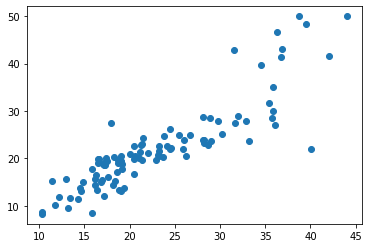

In [75]:
plt.scatter(y_pred, y_test)

In [76]:
import seaborn as sns

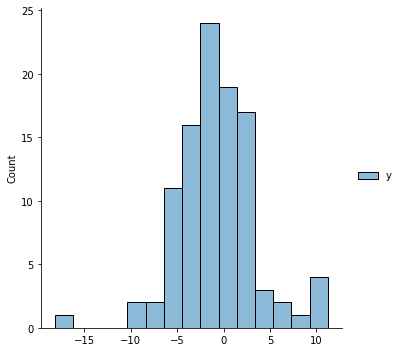

In [77]:
sns.displot(y_test - y_pred)

In [78]:
from scipy.stats import normaltest

In [79]:
normaltest(y_test - y_pred)

NormaltestResult(statistic=array([11.00545818]), pvalue=array([0.00407563]))

In [80]:
np.mean(y_test - y_pred)

y   -0.835898
dtype: float64

## Больше теории богу теории

## Особые допущения

**Weak exogeneity / Слабая экзогенность.**

Предполагается, что в переменной X нет ошибок(здорово, правда?), т.е. это не случайные переменные. Чтобы с этим бороться вообще говоря есть [разные способы](https://en.wikipedia.org/wiki/Errors-in-variables_models).


**Linearity / Линейность**

Это идея вообще говорит о том, что таргет может быть выражен с помощью линейной комбинации признаков.

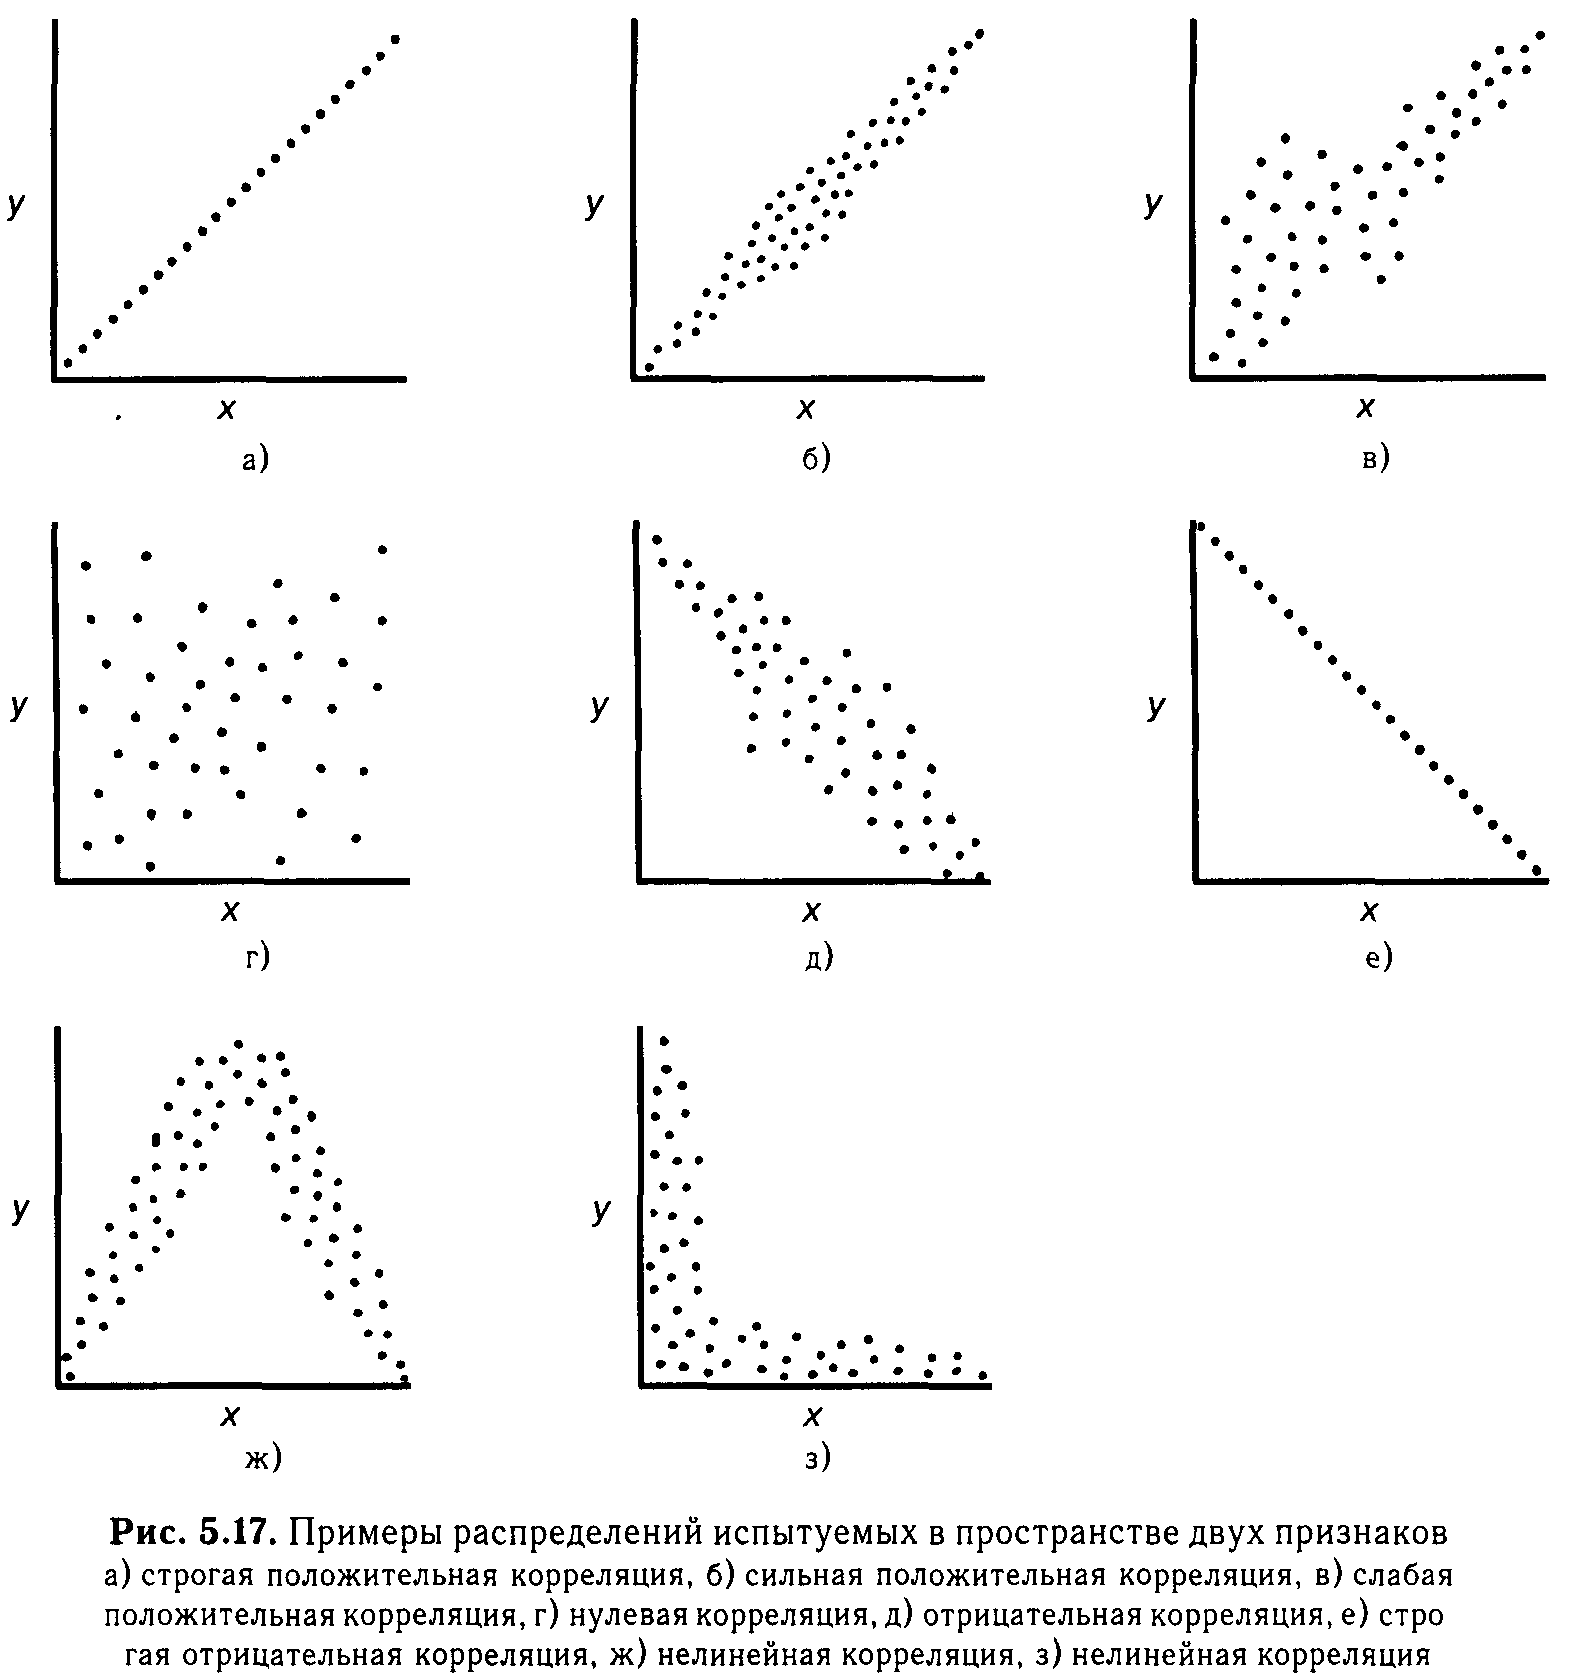


**Constant variance  / Гомоскедастичность**

Гомоскедастичность (англ. homoscedasticity) — свойство, означающее постоянство условной дисперсии вектора или последовательности случайных величин. Противоположное явление носит название гетероскедастичности. Является обязательным условием применения метода наименьших квадратов.





In [ ]:
# !!!!!!!!!!!!!!!!! ПОСМОТРЕТЬ ПРЕОБРАЗОВАНИЕ БОКСА-КОКСА
# 

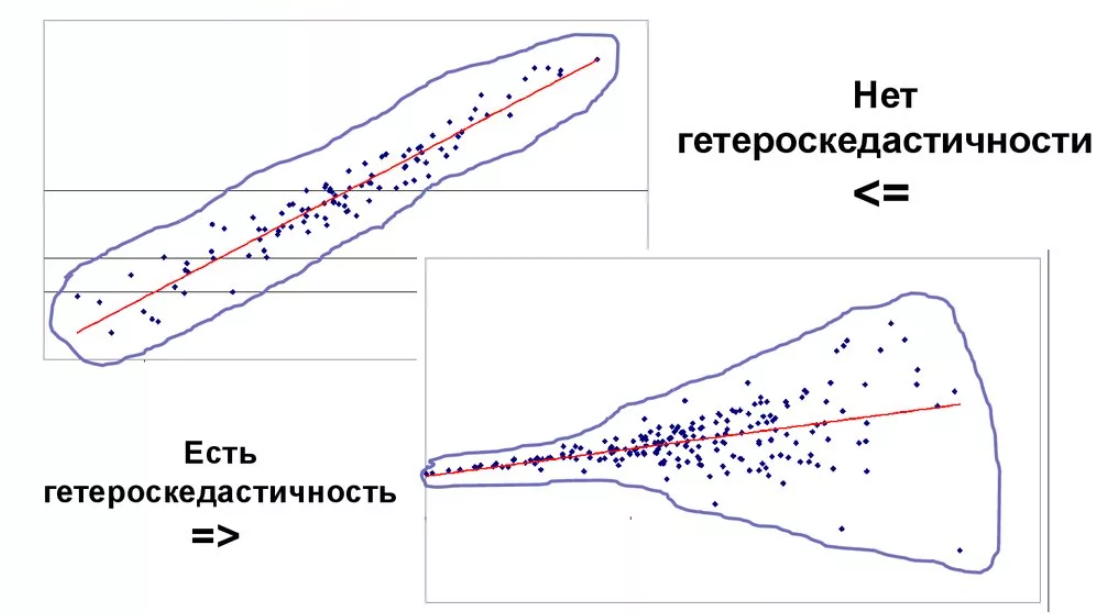

**Independence of errors / Независимость ошибок**

Под независимостью подразумевается чтобы ошибки между собой не коррелируют, т.е. мат ожидание от ошибок равно нулю. Если нет, либо выкидываем модель в мусорку либо [пытаемся от этого избавляться](https://en.wikipedia.org/wiki/Generalized_least_squares), в том числе регуляризацией. 

**Lack of perfect multicollinearity / Отсутствие мультиколлениарности**

Имеется в виду в самих признаках Х. Мультиколлениарность может образоваться например случайным дублированием признака или неслучайной дубликацией информации. Можно это также объяснить и через ранг матрицы. 

Из-за этого вектор коэф. (бета) не имеет единственного решения, дисперсия финальных результатов возрастает. Модель в целом не выкидывается в мусорку, но в наших же интересах такие переменные убирать. Способы тоже разные, например [VIF factor](https://medium.com/analytics-vidhya/multicollinearity-regularization-lasso-ridge-and-polynomial-regression-93bc90d2e4d).

## Что делать, если требования не выполняются?

### Наличие мультиколлениарности
Для начала необходимо определить есть ли она вообще. Для этого достаточно воспользоваться функцией corr. Если между двумя признаками есть сильная корреляция (больше 0.7 по модулю), необходимо выкинуть один из признаков

### Задача
Проверить наличие мультиколлениарности в датасете Boston. Если она есть выкинуть признаки из набора данных

In [83]:
corr_df = x_df.corr()
corr_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LSTAT2
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,0.460510
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-0.323323
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.532496
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,-0.047605
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.530723
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-0.545322
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,0.523764
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.448110
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.451766
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,0.494704


In [84]:
corr_df[corr_df > 0.8]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,LSTAT2
CRIM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN,NaN
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,1.000000,NaN,NaN,NaN,NaN


## Переобучение моделей и регуляризация

Если модель получается сложнее, чем данные, то на отложенной выборке результаты будут плохими. Это называется **переобучением**.

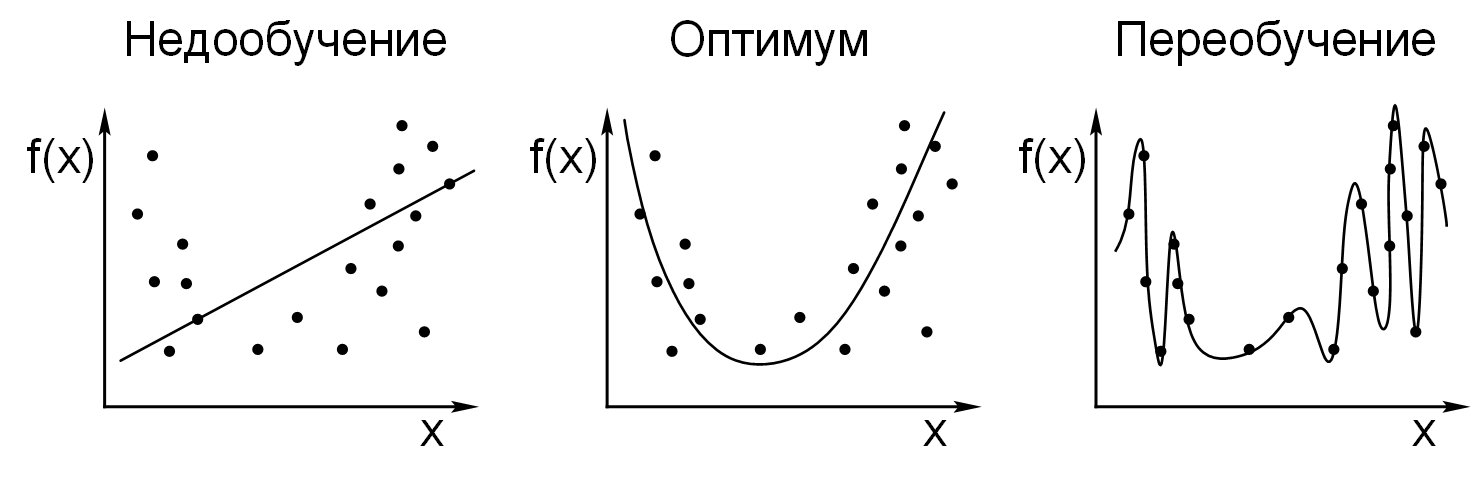

Чтобы бороться с переобучением, мы можем штрафовать модель за слишком большие веса. Это называется **регуляризацией**.


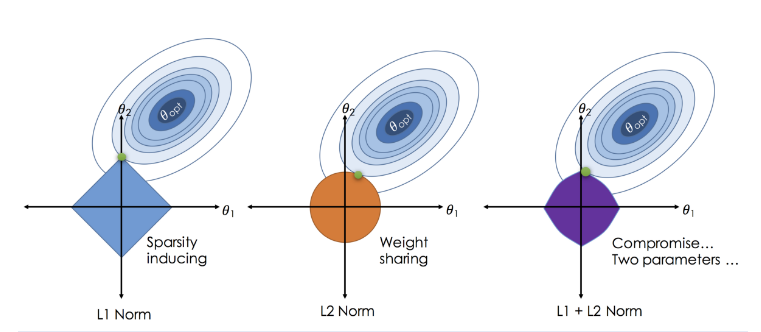

In [ ]:
# L1 - модуль - Lasso
# L2 - квадрат - Ridge

## Задача

Попробовать регуляризации L1 и L2 для решения задачи. Сравнить качество с обычной линейной регрессией

In [86]:
from sklearn.linear_model import Ridge, Lasso

# Классификация

Основное отличие задачи классификации от регрессии - способ оценки качества.

Самый простой способ определить насколько модель ошиблась - посмотреть на процент правильно угаданных ответов.

Эта метрика называется `accuracy_score`

Также, мы будем совершать ошибки первого и второго рода, поэтому полезно строить матрицу ошибок `confusion_matrix`

В задаче ниже мы будем классифицировать рукописные цифры

In [88]:
# Метрики классификации
# Accuracy = кол-во верно угаданных Октов в отношении ко всем Октам

In [95]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [104]:
data = load_digits()
x = data.data
y = data.target

Многим моделям гораздо проще работать с данными, у которых матожидание равно нулю, а среднеквадратичное отклонение 1, поэтому необходимо нормализовать данные

Нормализация данных обычно проходит по формуле:

## $\frac{x - x_{mean}}{ x_{std}}$

Другие способы нормализации пройдем позже

In [105]:
x = (x - x.mean()) / x.std()

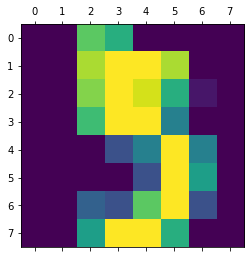

In [111]:
plt.matshow(x[5].reshape(8, 8))

Посмотрим на сбалансированность классов

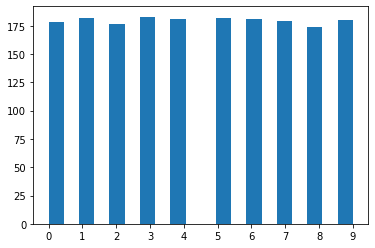

In [112]:
plt.hist(y, bins=20)
plt.xticks(list(range(10)))
plt.show()

Классы сбалансированы. Разобьем на train и test, спрогнозируем при помощи логистической регрессии.

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

## Логистическая регрессия

Логистическая регрессия - аналог линейной регрессии для задачи классификации. 

Возьмем линейную модель: $z=wx+b$

Как свести эту модель к задаче классификации? То есть, ограничить выход 0 и 1. 

Самый простой способ - взять функцию, которая возвращает значения от 0 до 1 и передать в нее значение линейной модели. 

Одна из таких функций - логит-функция:

## $f(z) = \frac{1}{1+e^{-z}}$

Построим ее график

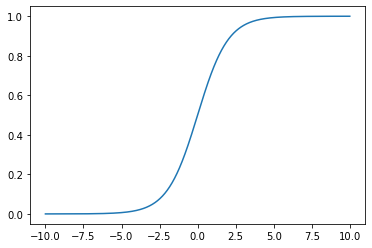

In [36]:
def f(z):
    return 1/(1 + np.exp(-z))

x = np.linspace(-10, 10, 1000)
plt.plot(x, f(x))

Как видим, в зависимости от того, насколько аргумент меньше нуля или больше нуля, значение функции ближе к нулю или единице.

Это можно интерпретировать как вероятность оказаться в первом или во втором классе.

### Обучение модели

Обучение модели использует **метод максимального правдоподобия**. 

Функция правдоподобия показывает вероятность того, что параметр распределения равен $w$, если известно, что выборка $X$ взята из этого распределения:

$L(w, X) = P(w|x=X)$

Чем больше эта функция, тем лучше, поэтому ее мы в дальнейшем будем максимизировать, а сейчас давайте ее построим.

Прогноз логистической регрессии - биномиальное распределение (получим 0 или 1).

Вероятность получить 0:

$p\{y=0|x\}=1 - f(xw)$

Вероятность получить 1:

$p\{y=1|x\}=f(xw)$

Тогда вероятность для произвольного $y$:

$p\{y|x\}=f(wx)^y(1-f(wx))^{1-y}$

Это верно для любого одного элемента выборки.

Мы считаем, что элементы выборки независимы друг от друга, поэтому вероятность того, что они реализуются одновременно можно посчитать по формуле произведения вероятностей.

Используя это, составим функцию правдоподобия.

$L(w) = \prod P\{y=y_i|x=x_i\}$

Искать максимум такой функции довольно сложно (производную произведения считать неприятно), поэтому обычно используют логарифм функции правдоподобия, который превращает произведение в сумму.

$log(L(w)) = \sum log(P\{y=y_i|x=x_i\})$

Тогда оптимальные параметры $w_{opt}$ можно найти по формуле:

$w_{opt} = argmax_w log(L(w))$

Максимизируем градиентным спуском, как и раньше.

Выше мы рассмотрели случай бинарной классификации. Его также можно обобщить на случай многоклассовой классификации, если использовать обобщение биномиального распределения на нужное количество исходов.

### Использование 

Разработчики `sklearn` позаботились о нас и написали класс `LogisticRegression`, чтобы нам не пришлось самостоятельно это все реализовывать, поэтому давайте им и воспользуемся.

У него в точности такой же интерфейс как у всех моделей до этого.

`LogisticRegression` работает для произвольного количества классов и определяет их автоматически по входным данным `y`

### Задача
Обучить линейную регрессию, посмотреть на точность модели на отложенной выборке

In [116]:
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

Посмотрим где модель ошиблась.

Если решаем задачу мультиклассовой классификации, обязательно смотрим confusion matrix. Тем более, если классы несбалансированы.

In [45]:
df_confusion = confusion_matrix(y_test, y_pred)
df_confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 25,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  2, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  1,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  1, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 42]], dtype=int64)

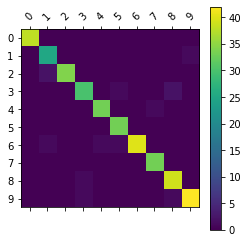

In [53]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix'):
    plt.matshow(df_confusion) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion))
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)
    #plt.tight_layout()

plot_confusion_matrix(df_confusion)

In [203]:
wrong_index = y_pred != y_test
real_y = y_test[wrong_index]
predicted_y = y_pred[wrong_index]
wrong_classified = x_test[wrong_index]

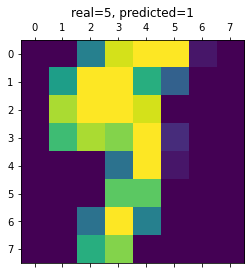

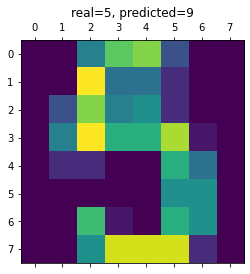

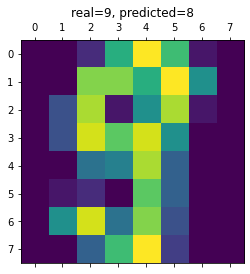

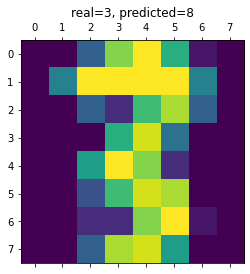

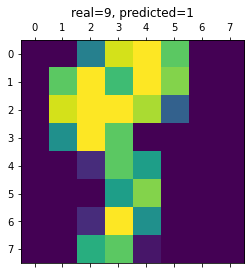

In [207]:
for i in range(5):
    plt.matshow(wrong_classified[i].reshape(8, 8))
    plt.title(f'real={real_y[i]}, predicted={predicted_y[i]}')

### Еще немножко теории

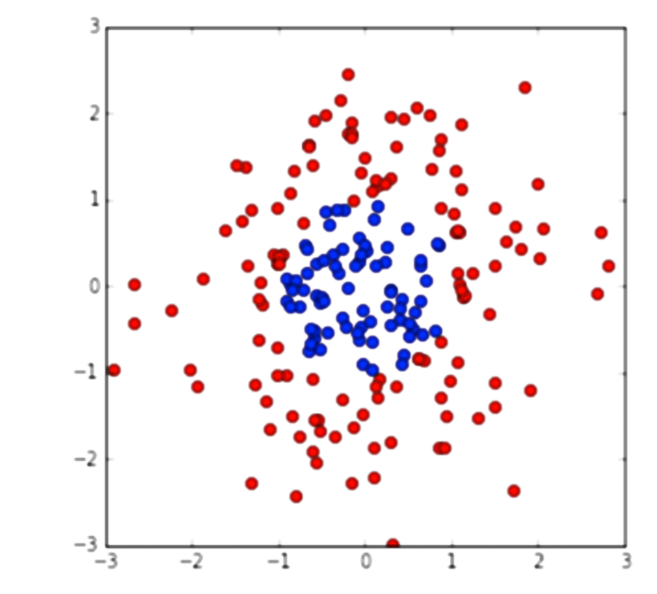

Бывает так, что мы не можем линейно разделить классы. Вот что произойдет если к данным выше применить логистическую регрессию

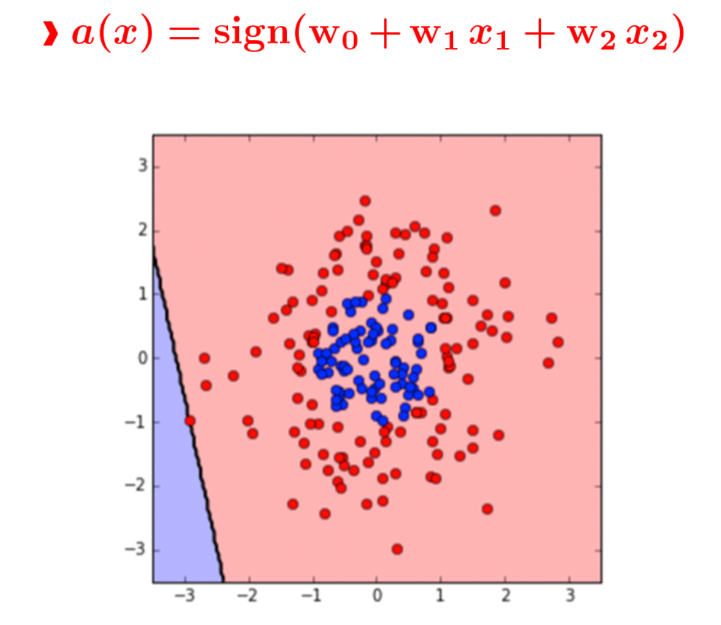

На помощь приходит опять же полиномиальная регрессия. Она выводит нас в новое пространство признаков, в котом наши данные могут быть линейно разделимы. 

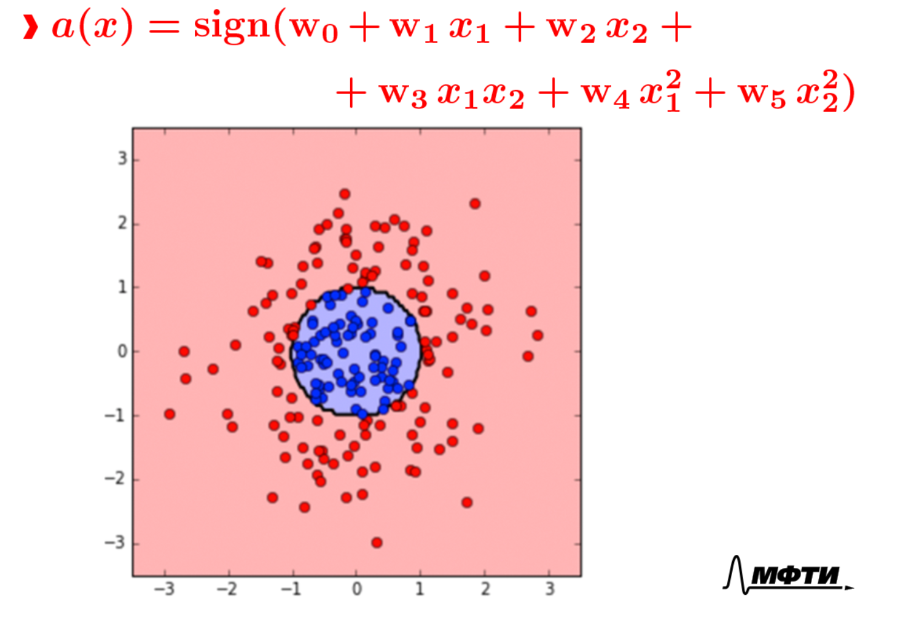

# Домашняя работа

## Easy

Для данных с Титаника обучить модели логистической регресси на 80% обучающей выборки и проверить результат на 20%. Вывести accuracy. 

## Normal

Для датасета Boston сделать лучшую линейную модель, которую можно легко интерпретировать. Сделать выводы о данных на основе вашей линейной регрессии.

## Hard

Чтобы окончательно разобраться с линейной регрессией, лучше всего один раз реализовать ее самостоятельно. В этом и состоит суть задания.

В качестве данных использовать датасет https://www.kaggle.com/mustafaali96/weight-height. Единицы измерения - дюймы и фунты.

Будем исследовать как рост зависит от веса для мужчин.

Алгоритм решения задачи:

1. Написать функцию для подсчета прогноза линейной регрессии $f(w, b, x) = wx + b$, в которой w и b - веса модели, которые мы будем оптимизировать, а x - входные данные (зависимая переменная). Обращаю внимание, что функция должна быть векторизована, то есть в x должна быть возможность передать вектор значений, а не одно число.

2. Написать функцию ошибки для модели $J(w, b, x)$. $w$, $b$ - параметры модели, а $x$ - вектор входящих данных. В качестве ошибки будем использовать [Mean Squared Error (MSE)](http://statistica.ru/glossary/general/srednekvadraticheskaya-oshibka/).

3. Минимизировать функцию J по параметрам $w$ и $b$, используя данные $x$. Минимизацию можно проводить при помощи функции minimize.

4. Подставить получившиеся минимальные значения w и b в функцию f, нарисовать диаграмму рассеивания (scatter plot) и отобразить работу модели (пример графика есть в этом ноутбуке)